In [10]:
# import the required modules

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as std
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [12]:
# download dataset form kaggle

In [13]:
df = pd.read_csv('hd.csv')

In [14]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [9]:
# normalize the dataset and split into train and test data

In [10]:
# putting  feature variable to X

In [16]:
x = df.drop('Heart Disease', axis = 1)

In [17]:
x

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [18]:
# putting response variable to y

In [19]:
y = df['Heart Disease']

In [20]:
y

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object

In [21]:
from sklearn.preprocessing import StandardScaler 

In [22]:
x_std = StandardScaler().fit_transform(x)

In [23]:
x_std

array([[ 1.71209356,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.87570581],
       [ 1.38213977, -1.45032695, -0.18355874, ...,  0.67641928,
        -0.71153494,  1.18927733],
       [ 0.2822938 ,  0.6894997 , -1.23804513, ..., -0.95423434,
        -0.71153494,  1.18927733],
       ...,
       [ 0.1723092 , -1.45032695, -1.23804513, ...,  0.67641928,
        -0.71153494, -0.87570581],
       [ 0.2822938 ,  0.6894997 ,  0.87092765, ...,  0.67641928,
        -0.71153494,  0.67303154],
       [ 1.38213977,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.87570581]])

In [24]:
# splitting the data into train and test

In [25]:
x_train ,x_test ,y_train ,y_test = train_test_split(x_std,y,test_size=0.30, random_state=101)

In [26]:
# model building 
# use KNN Algorithm
# to find optimum value of K we bulid a loop switch check all the posible values for K.
# Neighbors

In [27]:
neighbors = [x for x in list(range(1,50))if x%2 == 0]

In [28]:
# create empty list that will hold cv scores

In [29]:
cv_scores=[]

In [30]:
# perform 10-fold cross validation on training set for odd values of K:
seed = 110

In [31]:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value,weights='uniform',p=2,metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn,x_train,y_train,cv=kfold,scoring='accuracy')
    cv_scores.append(scores.mean()*100)

In [33]:
optimal_k= neighbors[cv_scores.index(max(cv_scores))]

In [34]:
print(optimal_k)

26


In [37]:
# print(("The optimum number of neighbors is %d with %0.1f%%"%(optimal_k,cv_scores[optimal_k])))

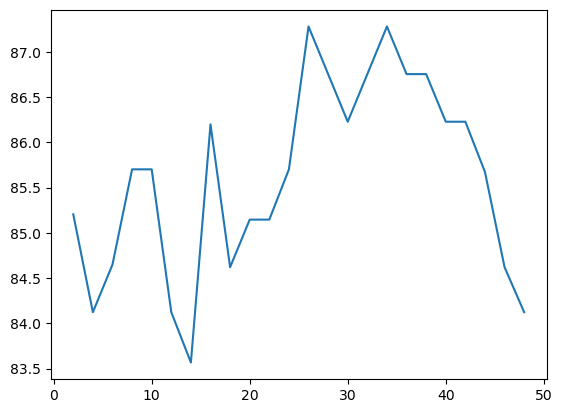

In [38]:
plt.plot(neighbors,cv_scores)

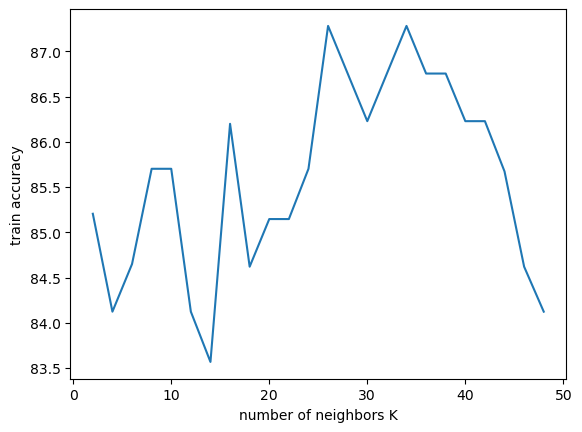

In [39]:
plt.xlabel('number of neighbors K')
plt.ylabel('train accuracy')
plt.show(plt.plot(neighbors,cv_scores))

In [40]:
# prediction of heart disease and find the accuracy of prediction 
# KNN

In [41]:
knn=KNeighborsClassifier(n_neighbors=8)

In [42]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [83]:
y_pred= knn.predict(x_test)

In [43]:
acc_train=round(knn.score(x_train,y_train)*100,2)
acc_val=round(knn.score(x_test,y_test)*100,2)
print("accuracy of training dataset:"+str(acc_train))
print("accuracy of training dataset:"+str(acc_val))

accuracy of training dataset:86.24
accuracy of training dataset:81.48


In [ ]:
# The KNN model was able to predict the heart disease with a accuracy of 81.48